In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format # Hilangin notasi scientific (1.e20)
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path_1 = 'gdrive/My Drive/DigitalSkola/Dataset/rfm_data.csv'

df = pd.read_csv(path_1)

In [ ]:
df.head()

,Unnamed: 0,CustomerID,InvoiceNo,LatestDay,SpendingPerInvoice
0,0,12346.00,1,325,77183.60
1,1,12347.00,7,366,615.71
2,2,12348.00,4,357,449.31
3,3,12349.00,1,18,1757.55
4,4,12350.00,1,309,334.40


In [ ]:
df = df[['CustomerID', 'InvoiceNo', 'LatestDay', 'SpendingPerInvoice']]

In [ ]:
df.isnull().sum()

CustomerID            0
InvoiceNo             0
LatestDay             0
SpendingPerInvoice    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,InvoiceNo,LatestDay,SpendingPerInvoice
count,4338.00,4338.00,4338.00,4338.00
mean,15300.41,4.27,222.21,419.17
std,1721.81,7.70,117.88,1796.54
min,12346.00,1.00,0.00,3.45
25%,13813.25,1.00,112.00,178.63
50%,15299.50,2.00,248.00,293.90
75%,16778.75,5.00,326.00,430.11
max,18287.00,209.00,373.00,84236.25


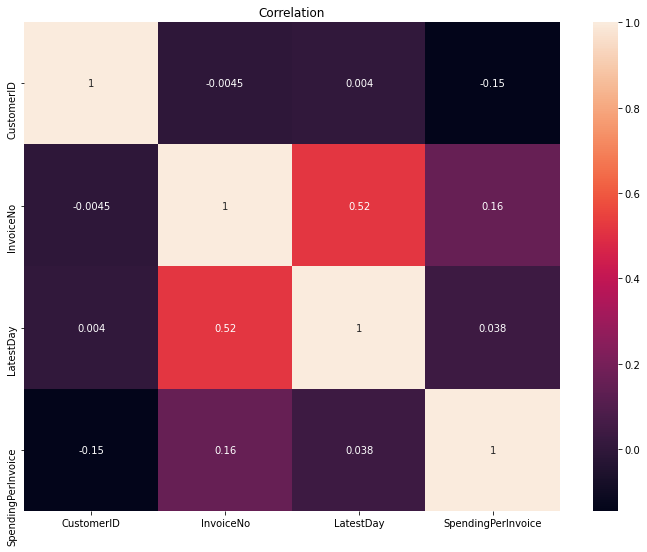

In [13]:
data_corr = df.corr(method='spearman')

plt.figure(figsize=(12, 9))
plt.title('Correlation')
sns.heatmap(data_corr, annot=True)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Normalize the Value using Z-Normalization
MS = MinMaxScaler().fit(df.iloc[:,1:])
scaled_df = MS.transform(df.iloc[:,1:])

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

kmeans_kwards = {
    "init" : "k-means++",
    "n_init" : 10,
    "max_iter" : 300,
    "random_state" : 7,
}

# List to holds the SSE (Sum of Square Error) for each K
sse = []
sil_score = []

for k in range(2,12):
  kmeans = KMeans(n_clusters = k, **kmeans_kwards)
  kmeans.fit(scaled_df)
  prediction = kmeans.predict(scaled_df)

  silhouette_avg = silhouette_score(scaled_df, prediction)
  sil_score.append(silhouette_avg)
  sse.append(kmeans.inertia_)

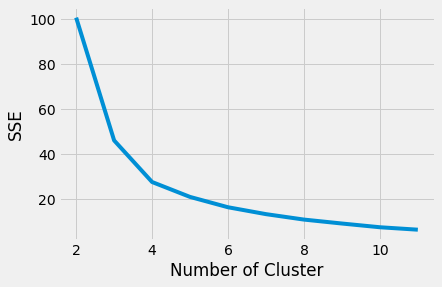

In [16]:
# Plot Inertia Scores
plt.style.use('fivethirtyeight')
plt.plot(range(2,12), sse)
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()

In [18]:
!pip install kneed

In [19]:
from kneed import KneeLocator

kl = KneeLocator(range(2,12), sse, curve = 'convex', direction = 'decreasing')
kl.elbow

4

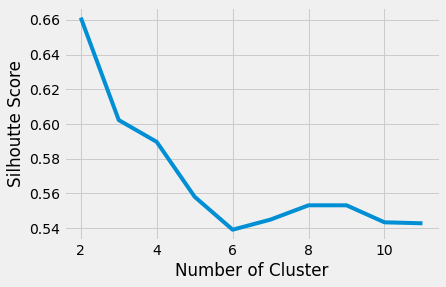

In [20]:
# Plot Inertia Scores
plt.style.use('fivethirtyeight')
plt.plot(range(2,12), sil_score)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')
plt.show()

In [21]:
# Use K = 5
kmeans_5 = KMeans(init = 'k-means++', n_clusters=5, n_init=10, max_iter=300, random_state=7)
kmeans_5.fit(scaled_df)
predict_5 = kmeans_5.predict(scaled_df)

In [22]:
print(kmeans.inertia_)

6.495923535273727


In [23]:
df['cluster_result'] = predict_5
df.head()

,CustomerID,InvoiceNo,LatestDay,SpendingPerInvoice,cluster_result
0,12346.00,1,325,77183.60,4
1,12347.00,7,366,615.71,1
2,12348.00,4,357,449.31,1
3,12349.00,1,18,1757.55,0
4,12350.00,1,309,334.40,4


In [24]:
df.cluster_result.unique()

array([4, 1, 0, 2, 3], dtype=int32)

In [26]:
center = pd.DataFrame(MS.inverse_transform(kmeans_5.cluster_centers_))
center.columns = ['InvoiceNo', 'LatestDay', 'SpendingperInvoice']

In [27]:
center

,InvoiceNo,LatestDay,SpendingperInvoice
0,1.65,50.55,384.12
1,9.02,360.76,394.15
2,3.17,235.07,463.45
3,2.43,151.11,384.40
4,4.09,299.32,473.25


In [28]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_df)
pca_X = pca.transform(scaled_df)

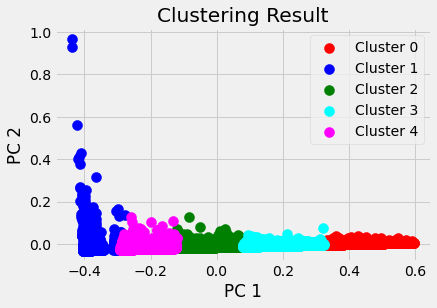

In [29]:
plt.scatter(pca_X[predict_5 == 0, 0], pca_X[predict_5 == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(pca_X[predict_5 == 1, 0], pca_X[predict_5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(pca_X[predict_5 == 2, 0], pca_X[predict_5 == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(pca_X[predict_5 == 3, 0], pca_X[predict_5 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(pca_X[predict_5 == 4, 0], pca_X[predict_5 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(scatterpoints = 1)
plt.title('Clustering Result')
plt.show()

In [30]:
# Use K = 5
kmeans_5 = KMeans(init = 'k-means++', n_clusters=5, n_init=10, max_iter=300, random_state=7)
kmeans_5.fit(pca_X)
predict_5 = kmeans_5.predict(pca_X)

In [31]:
kmeans_5.inertia_

21.03300522120054